## **Train.ipynb**

<p style='text-align:justify;'>[⚡️] This is the trainer notebook for the random forest classification model of the final project Classification of Fraudulent Credit Card Transactions using Random Forest Supervised Learning </p>


---
#### **Table of Contents**

1. [[🎯] Objective](#objective)
2. [[📦] Import Libraries](#imports)
3. [[🧹] Data Preprocessing](#preprocessing)
4. [[🔍] Exploratory Data Analysis](#eda)
5. [[🏋️‍♂️] Model Training](#training)
6. [[✅] Model Evaluation](#evaluation)
7. [[📁] Model Exporting](#export)
---

#### **Objective** <a id='objective'></a>

#### **[📦] Import Libraries** <a id='imports'></a>

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
import graphviz

import joblib

plt.rcParams["figure.figsize"] = (10,6)

### **[🧹] Data Preprocessing** <a id='preprocessing'></a>
**Dataset:**

Dhanush Narayanan R. (April 2021). Credit Card Fraud, Version 1. Retrieved April 24, 2025, from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data

In [202]:
### Project Constants
INPUT_PATH: str = "data/card_transdata.csv"
SPLIT_PERCENTAGE: float = 0.2



### Load the dataset
df: pd.DataFrame = pd.read_csv(INPUT_PATH)


df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [203]:
# Check if dataset includes null values
# If true, we will fill them with the average value
# Else, we proceed
null_count = df.isna().sum()
print('Null count: ', null_count)
if null_count.sum() > 0:
    print('Filling null values with average')
    df.fillna(df.mean(), inplace=True)

Null count:  distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [204]:
# Check if dataset includes duplicates
# If true, we will drop them
# Else, we proceed
duplicates_count = df.duplicated().sum()
print('Duplicates count: ', duplicates_count)
if duplicates_count > 0:
    print('Dropping duplicates')
    df.drop_duplicates(inplace=True)

Duplicates count:  0


In [205]:
# Check if dataset includes categorical columns
# If true, we will perform numeric encoding to them
# Else, we proceed
num_count = df.select_dtypes(exclude=["float64", "int64"])
print('Numerical count count: ', num_count)
if num_count.shape[1] > 0:
    print('Encoding categorical columns')
    for col in num_count.columns:
        df[col] = pd.factorize(df[col])[0]
else:
    print('No categorical columns to encode')

Numerical count count:  Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1000000 rows x 0 columns]
No categorical columns to encode


### Outlier Detection

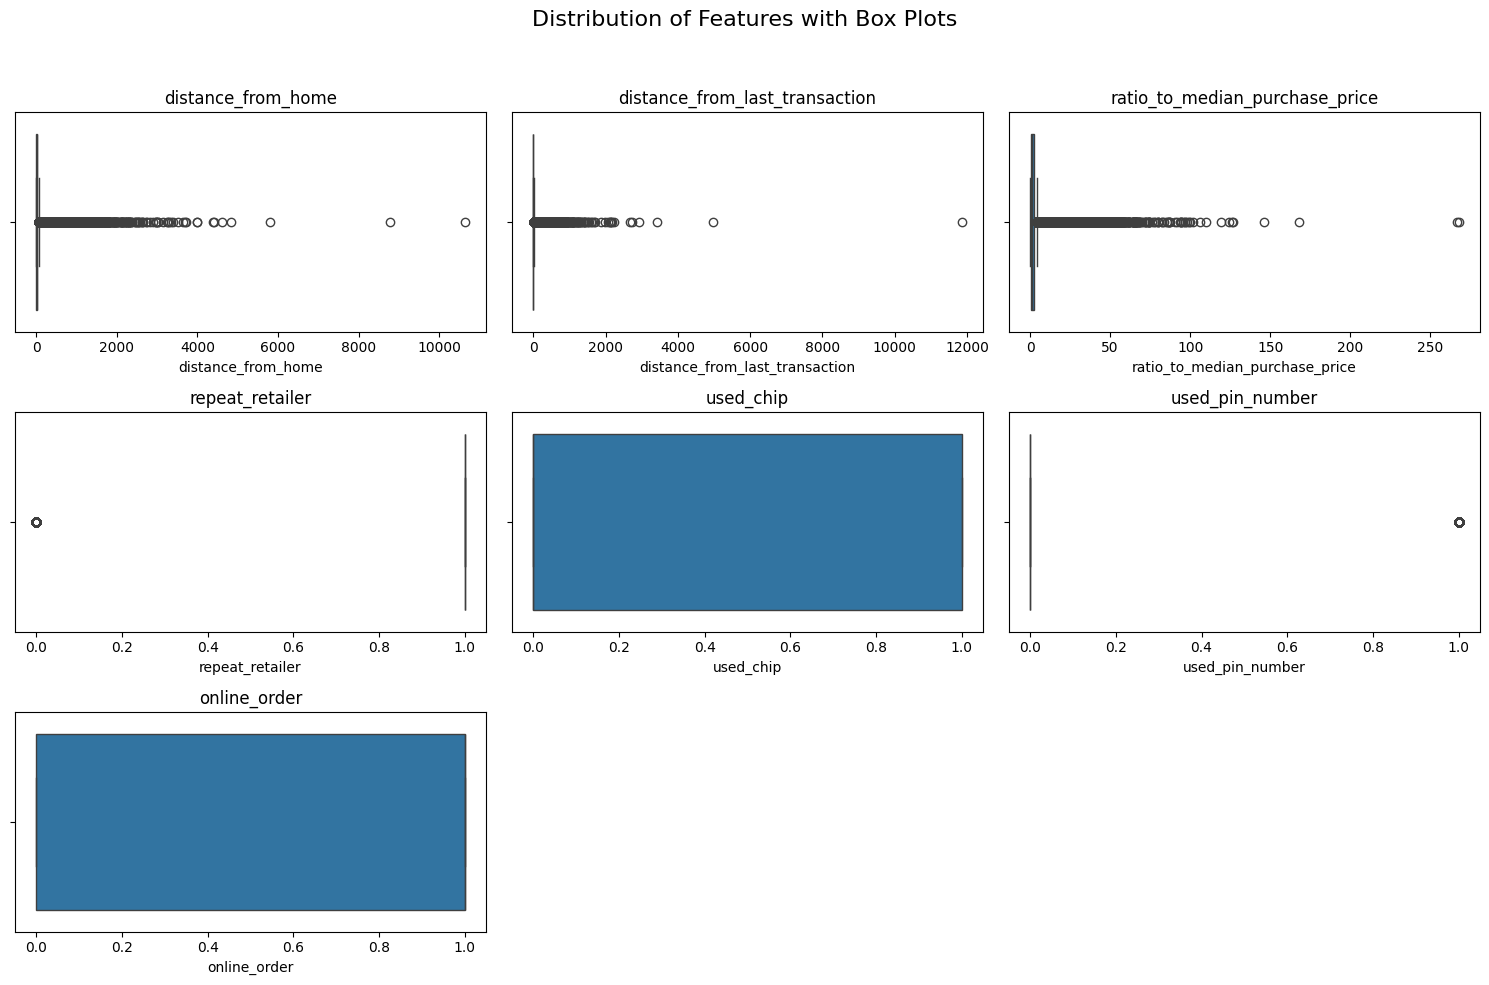

Outlier Analysis using IQR Method:
distance_from_home: 103631 outliers (10.36%)
  - Range: [0.00, 10632.72]
  - IQR Bounds: [-28.92, 58.54]
  - Fraud in outliers: 25721.0 (24.82%)
------------------------------------------------------------------------------------------------------------
distance_from_last_transaction: 124367 outliers (12.44%)
  - Range: [0.00, 11851.10]
  - IQR Bounds: [-4.29, 7.94]
  - Fraud in outliers: 15967.0 (12.84%)
------------------------------------------------------------------------------------------------------------
ratio_to_median_purchase_price: 84386 outliers (8.44%)
  - Range: [0.00, 267.80]
  - IQR Bounds: [-1.96, 4.53]
  - Fraud in outliers: 53092.0 (62.92%)
------------------------------------------------------------------------------------------------------------
repeat_retailer: 118464 outliers (11.85%)
  - Range: [0.00, 1.00]
  - IQR Bounds: [1.00, 1.00]
  - Fraud in outliers: 10478.0 (8.84%)
-----------------------------------------------------

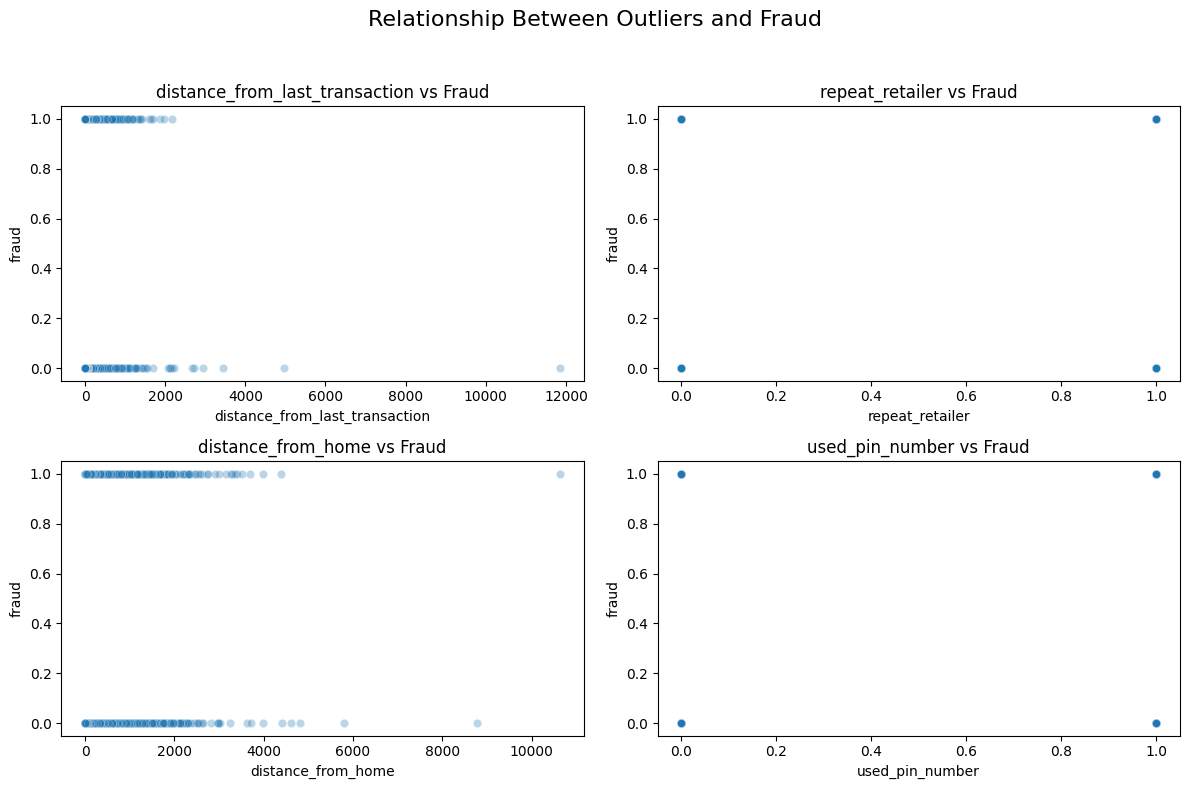


Keeping outliers as they might be important for fraud detection...

Original dataframe shape: (1000000, 8)
Processed dataframe shape: (1000000, 8)


In [206]:
# Visualization of Data Distribution
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Features with Box Plots', fontsize=16)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)
rows = (num_cols + 1) // 3

for i, col in enumerate(numeric_cols):
    if col != 'fraud':
        plt.subplot(rows, 3, i+1)
        sns.boxplot(x=df[col])
        plt.title(f'{col}')
        plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

print("="*108)
print("Outlier Analysis using IQR Method:")
print("="*108)

outlier_counts = {}
for col in numeric_cols:
    if col != 'fraud':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100
        
        outlier_counts[col] = outlier_count
        
        print(f"{col}: {outlier_count} outliers ({outlier_percent:.2f}%)")
        print(f"  - Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
        print(f"  - IQR Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        
        if outlier_count > 0:
            fraud_in_outliers = outliers['fraud'].sum()
            fraud_percent = (fraud_in_outliers / outlier_count) * 100
            print(f"  - Fraud in outliers: {fraud_in_outliers} ({fraud_percent:.2f}%)")
        print("-" * 108)

plt.figure(figsize=(12, 8))
plt.suptitle('Relationship Between Outliers and Fraud', fontsize=16)

top_outlier_cols = sorted(outlier_counts, key=outlier_counts.get, reverse=True)[:4]

for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df[col], y=df['fraud'], alpha=0.3)
    plt.title(f'{col} vs Fraud')
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


outlier_method = 'none'
df_processed = df.copy()

if outlier_method == 'remove':
    print("\nRemoving outliers...")
    rows_to_drop = set()
    for col in numeric_cols:
        if col != 'fraud':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            rows_to_drop.update(outlier_indices)
    

    df_processed = df_processed.drop(index=list(rows_to_drop))
    print(f"Removed {len(rows_to_drop)} rows with outliers ({len(rows_to_drop)/len(df)*100:.2f}% of data)")

elif outlier_method == 'clip':
    print("\nClipping outliers to IQR boundaries...")
    for col in numeric_cols:
        if col != 'fraud':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)

else:
    print("\nKeeping outliers as they might be important for fraud detection...")


print(f"\nOriginal dataframe shape: {df.shape}")
print(f"Processed dataframe shape: {df_processed.shape}")

df = df_processed


In [207]:
# Perform Train-Test Split on dataset with 80/20
# Seaparate the feature columns and the target columns
# Call the test_train_split() function
X: pd.DataFrame = df.drop("fraud", axis=1)
y: pd.DataFrame = df["fraud"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=SPLIT_PERCENTAGE)

### **[🔍] Exploratory Data Analysis** <a id='eda'></a>

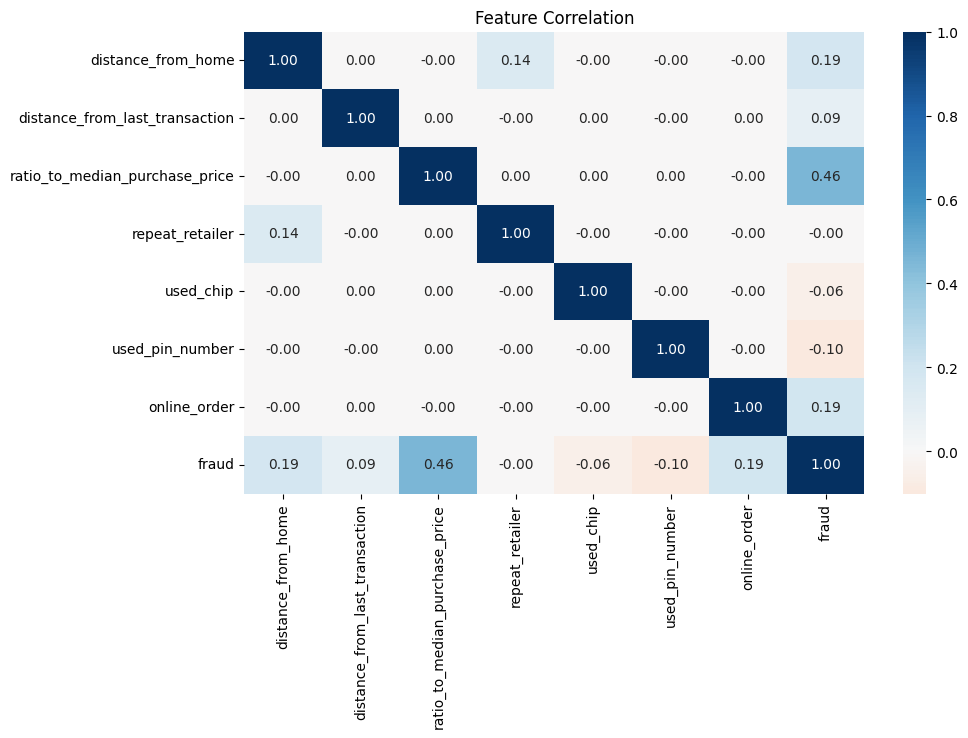

In [208]:
# Seaborn Correlation Heatmap
plt.title("Feature Correlation")
sns.heatmap(df.corr(), cmap="RdBu", center=0, annot=True, fmt=".2f")
plt.show()


### **[🏋️‍♂️] Model Training** <a id="training"> </a>

In [209]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### **[✅] Model Evaluation** <a id="evaluate"></a>
Make sure graphviz is in your system to view dot-graph of random forest's decision trees.

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182662
         1.0       1.00      1.00      1.00     17338

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



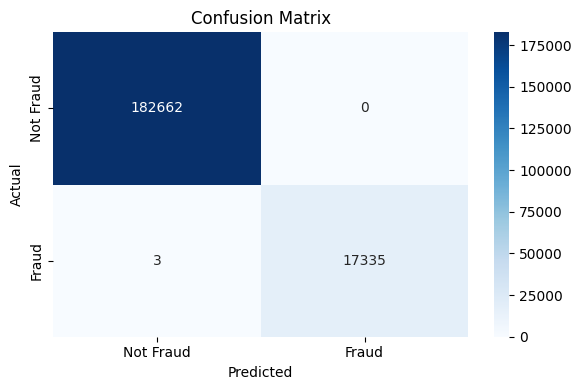

Accuracy Score: 0.999985


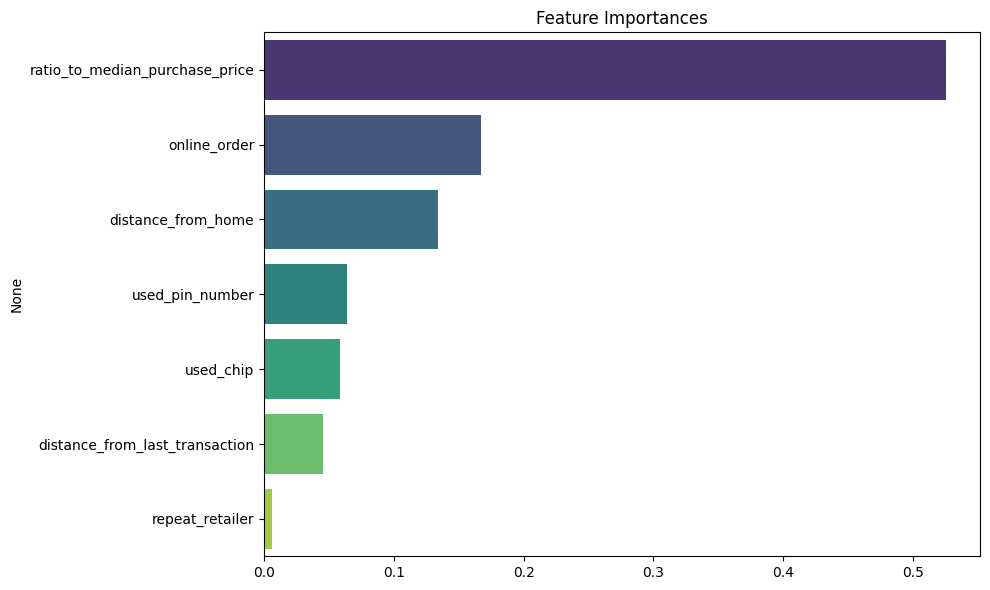

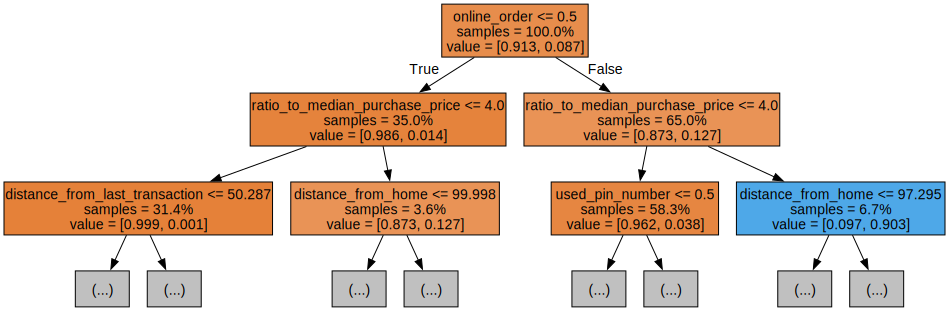

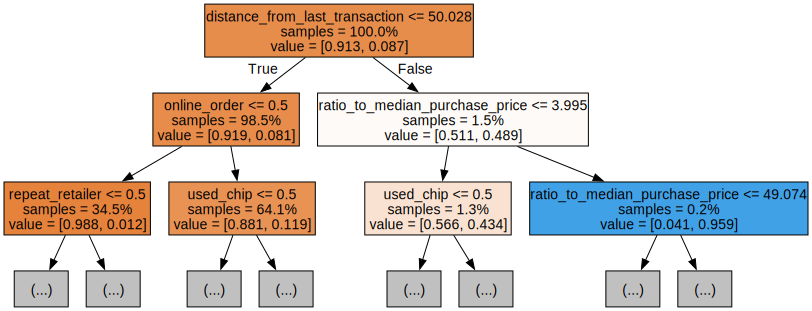

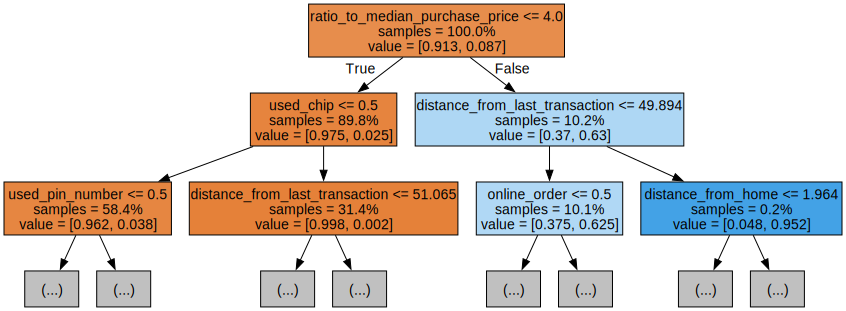

In [210]:
y_pred = rf.predict(X_test)
print("="*108)
print("Classification Report:\n", classification_report(y_test, y_pred))

print("="*108)
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud', 'Fraud']

# Plot as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
print("="*108)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("="*108)

# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=features[indices], palette="viridis", hue=features[indices])
plt.tight_layout()
plt.show()

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### **[📁] Model Exporting** <a id='export'></a>

In [211]:
joblib.dump(rf, "model/fraud_detection.pkl")
print("Model saved as 'fraud_detection")

Model saved as 'fraud_detection


In [233]:
# Create a sample transaction with high ratio_to_median_purchase_price
sample_transaction = pd.DataFrame({
    'distance_from_home': [1200.0],
    'distance_from_last_transaction': [100.0],
    'ratio_to_median_purchase_price': [2.0],  # High ratio
    'repeat_retailer': [0.0],
    'used_chip': [1.0],
    'used_pin_number': [0.0],
    'online_order': [0.0]
})

# Make prediction
prediction = rf.predict_proba(sample_transaction)

print("Prediction probabilities:")
print(f"Not Fraud: {prediction[0][0]:.2%}")
print(f"Fraud: {prediction[0][1]:.2%}")

if prediction[0][1] > 0.5:
    print("\nWarning: This transaction is likely fraudulent!")
else:
    print("\nThis transaction appears legitimate.")

Prediction probabilities:
Not Fraud: 33.00%
Fraud: 67.00%

